

# <p style="background-color:white;font-family:newtimeroman;color:orangered;font-size:150%;text-align:center;border-radius:20px 60px;">Rental Bike Sharing Regression Model </p>



# <p style="background-color:white;font-family:newtimeroman;color:teal;font-size:80%;text-align:center;border-radius:20px 60px;">A US bike-sharing provider has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. </p>

![](https://missionzero.sheridancollege.ca/wp-content/uploads/2019/04/DSC03493-1600x1200.jpg)



*In such an attempt, the company aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.*

## Business Objective :

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.

*Further, the model will be a good way for management to understand the demand dynamics of a new market.*

### Let's get started . . . 

<a id="1"></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">1. Initial Setup</p>

### 1.1 Basic Python Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as m
import matplotlib.pyplot as plt


%matplotlib inline

### 1.2 Handle Warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 1.3 Import Scikit Learn Library 

In [3]:
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### 1.4 Import StatsModel Library

In [4]:
import statsmodels.api as sm
from scipy import stats
#to get the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor




# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">2. Data Sourcing & Inspection</p>

### 2.1 Import Dataset

In [259]:
cd ../input/rental-bike-sharing

[Errno 2] No such file or directory: '../input/rental-bike-sharing'
/kaggle/input/rental-bike-sharing


In [5]:
bike_df = pd.read_csv("bike_hourdata.csv")

### 2.2 Data Inspection

In [6]:
bike_df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [262]:
bike_df.shape

(731, 16)

**Observations :**
    
    1. Total number of rows : 731
    2. Total number of columns : 16

In [263]:
# check for datatypes
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Observations :**
    
    1. We have just one column with Object data type, however it contains Dates.
    2. Majority of the columns have int data type, while a few are float
    3. Some categorical fields have numerical data types (will analyse & convert them to categorical if needed)






In [264]:
#check for numerical summary
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [265]:
#check for columns present in dataset
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### 2.3 Check for Nulls

In [266]:
null_count = bike_df.isnull().sum()
print(null_count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### We have no null values present in any column of the dataset

### 2.4 Check for Duplicates

In [267]:
dup_df = bike_df.copy()

In [268]:
dup_df.drop_duplicates(inplace= True)

In [269]:
dup_df.shape

(731, 16)

In [270]:
bike_df.shape

(731, 16)

**No change in shape signifies we don't have any duplicate value present in our dataset**

### 2.5 Data Cleaning

In [8]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 2.0+ MB


**As observed** :
    
    Columns : season, yr, month, holiday, weekday and weathersit despite being categorical in nature have int64 as datatype. 
        
**We can instead map some of these columns with the given details from data dictionary (Dataset Characteristics)**

#### 2.5.1 season

In [272]:
bike_df.season.describe()

count    731.000000
mean       2.496580
std        1.110807
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

**It is clearly a categorical nominal data. We can map it to the respective seasons in order to draw better inference :**
    
        1: spring
        2: summer
        3: fall
        4: winter

In [7]:
bike_df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace =True)


#### 2.5.2 weekday

**Similarly mapping weekdays to the respective values**

- 0: Sunday   
- 1: Monday
- 2: Tuesday
- 3: Wednesday
- 4: Thursday
- 5: Friday
- 6: Saturday

In [9]:
bike_df['weekday'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}, inplace =True)


#### 2.5.3 weathersit

**Mapping weathersit with the respective values (from data dictionary)**

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    

In [275]:
 bike_df['weathersit'].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

In [10]:
bike_df['weathersit'].replace({1: 'Clear/Partly cloudy', 2: 'Mist/Cloudy', 3: 'Light-Snow/Rain/Storm'}, inplace =True)

#since fourth category isn't present in our dataset, we don't need to map it

In [277]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,Saturday,0,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,Sunday,0,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,Monday,1,Clear/Partly cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,Tuesday,1,Clear/Partly cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,Wednesday,1,Clear/Partly cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### 2.5.5  Remove unwanted columns

Some of the columns are redundant and an be remove without impacting our analysis :
    
1. **instant** : Just shows up the index value for each record 
2. **casual & registered** : Our target variamble cnt already shows up the sum of casual and registered and hence we can drop these two
3. **date** :  Clearly, month and year are separately displayed in other columns (month and yr) We can hence manage without this column

**Adding these changes to a new dataframe in order to preserve the original one for later reference.**

In [1]:
bike_df.columns

NameError: name 'bike_df' is not defined

In [12]:
# creating a new data set without columns : instant, dteday casual and registered

new_bike = bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]

In [13]:
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   holiday     17379 non-null  int64  
 4   weekday     17379 non-null  object 
 5   workingday  17379 non-null  int64  
 6   weathersit  17379 non-null  object 
 7   temp        17379 non-null  float64
 8   atemp       17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  cnt         17379 non-null  int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 1.6+ MB


#### 2.5.6 Fix datatype

Setting up the right datatype for all numerical columns using pd.to_numeric()

In [14]:
new_bike[['temp', 'atemp', 'hum', 'windspeed','cnt']] = new_bike[['temp', 'atemp', 'hum', 'windspeed','cnt']].apply(pd.to_numeric)

In [15]:
new_bike.info()

#already correct - verified

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  object 
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   holiday     17379 non-null  int64  
 4   weekday     17379 non-null  object 
 5   workingday  17379 non-null  int64  
 6   weathersit  17379 non-null  object 
 7   temp        17379 non-null  float64
 8   atemp       17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  cnt         17379 non-null  int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 1.6+ MB


In [16]:
# It's visible that even some of the categorical variables have float64/int64 datatype.
## We can convert these to object type

new_bike['mnth'] = new_bike['mnth'].astype('object')
new_bike['weekday'] = new_bike['weekday'].astype('object')
new_bike['season'] = new_bike['season'].astype('object')
new_bike['weathersit'] = new_bike['weathersit'].astype('object')


<a id="1"></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">3. EDA</p>

#### 3.1 Numerical variables analysis

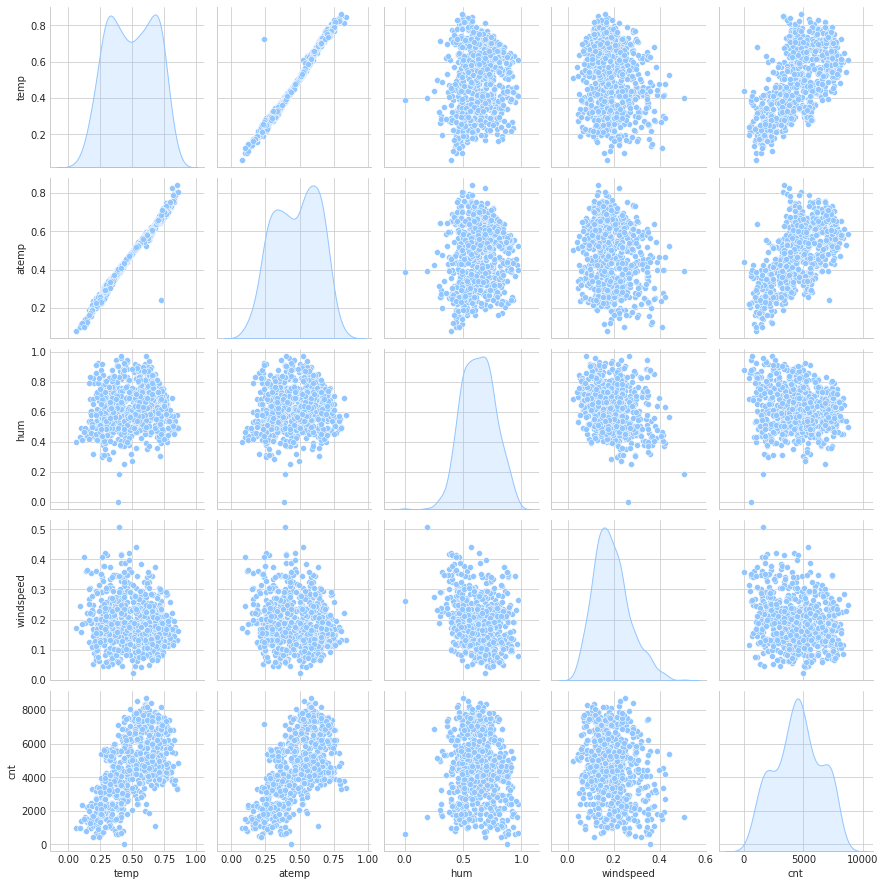

In [284]:
num_vars = new_bike[['temp', 'atemp', 'hum', 'windspeed','cnt']]
plt.style.use('seaborn-whitegrid')
sns.pairplot(num_vars, diag_kind='kde')
plt.show()

**Inference :** From the above pair plot it can be clearly observed that there exists a linear relationship between :
        
        temp
        
        atemp
        
        cnt

**It is evident that we have two similar fields :**
    
    - temp : temperature in Celsius
    - atemp: feeling temperature in Celsius
        
We can check if there exists a positive correlation between them

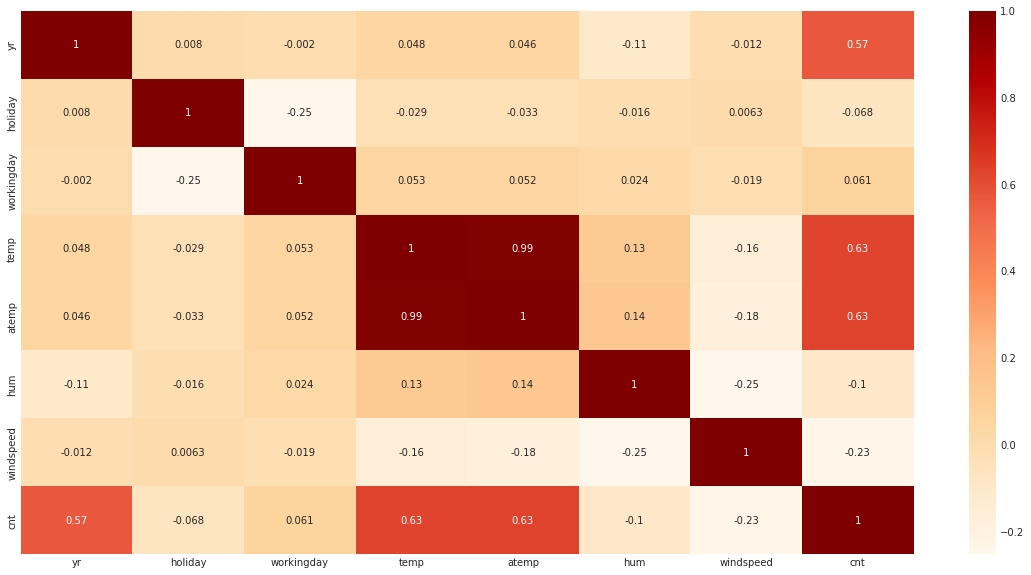

In [285]:
# using heatmap to check correlation

plt.figure(figsize=(20,10))
sns.heatmap(new_bike.corr(), annot = True, cmap="OrRd")
plt.show()

**Inference** : As suspected, there is 99% correlation between temp and atemp. 
    
    We can hence drop one of these later while building our model.

#### 3.2 Categorical variables analysis

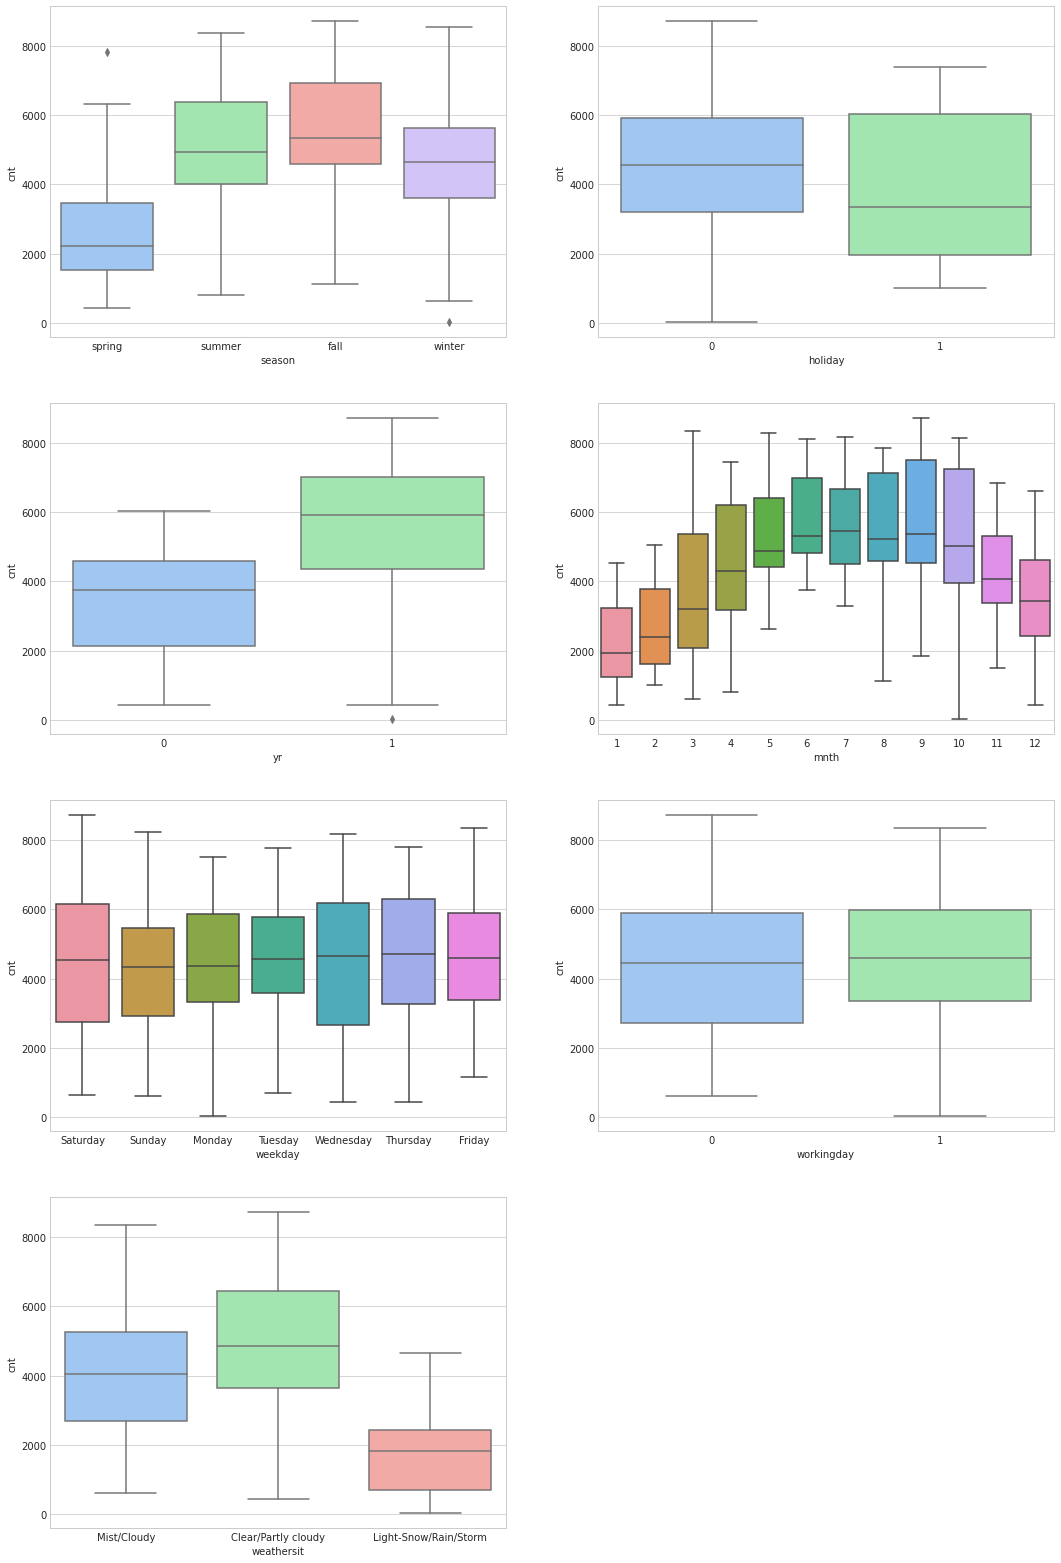

In [286]:
## Use subplots to analyse predictors (categorical variables) against target variable 'cnt' and outliers (if any)

plt.figure(figsize=(18, 28))
plt.style.use('seaborn-whitegrid')

plt.subplot(4,2,1)
sns.boxplot(x='season', y='cnt', data= new_bike)

plt.subplot(4,2,2)
sns.boxplot(x='holiday', y='cnt', data= new_bike)

plt.subplot(4,2,3)
sns.boxplot(x='yr', y= 'cnt', data= new_bike)

plt.subplot(4,2,4)
sns.boxplot(x='mnth', y='cnt', data= new_bike)

plt.subplot(4,2,5)
sns.boxplot(x='weekday', y='cnt', data= new_bike)

plt.subplot(4,2,6)
sns.boxplot(x='workingday', y='cnt', data= new_bike)

plt.subplot(4,2,7)
sns.boxplot(x='weathersit', y='cnt', data= new_bike)

plt.show()

### Inferences :

    
   **1. season :** One-third (more than 30%) of the bookings were done in fall season and the median lies around 5000, followed by Summer and Winter. Clealry this can serve as a **good predictor** for our analysis.
    
    
   **2. holiday :** Majority(~ 97%) of the booking took place whne it wasn't a holiday. We have a very high bias here and thus it **maynot be a good predctor** variable.
     
        
   **3. yr :** During yr 1 , we have more number of bookings (almost twice) than yr 0. Since our analysis will be based only on two years (2018 and 2019), they are **important predictors**.
        
        
   **4. mnth :** Distribution of months looks like a normally distributed, with months : 5-9 leading in number of bbokings and crossing the median over around 4500-5000. This indeed can serve as a **good predictor**.
        
        
   **5. weekday :** No clear pattern observed here as all the days show a similar spread This maynot be able to serve as a **good predictor**
        
        
   **6. workingday :** We have a high booking count on working day (i.e 1)and a median value close to 5000. It may serve as a **good predictor**
       
        
   **7. weathersit :** Majority of the bookings took place during a clear/partly cloudy weather with a median at around 5000 followed by misty/cloudy weather, with median 4000. This can also serve as a **good predictor**.

#### 3.3 Distribution of variables across rental cnt


In [287]:
# Generic function to plot graphs

def distribution(data, title, x_label, y_label):
    plt.figure(figsize=(8,5))
    plt.style.use('seaborn-pastel')
    density = sns.barplot(x=data.index, y=data.values)
    title = plt.title(title, fontdict={'fontsize': 20})
    plt.xlabel(x_label)
    plt.ylabel(y_label)
plt.show()

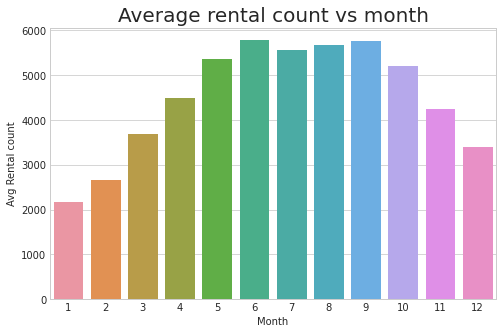

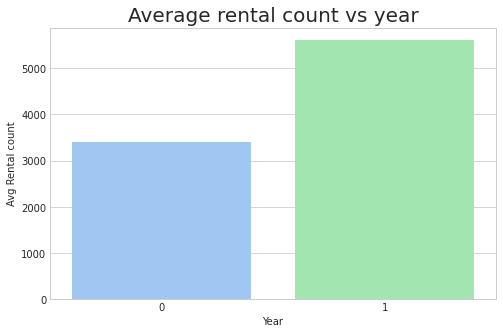

In [288]:
#month vs rental count
dist1 = bike_df.groupby(by= 'mnth').cnt.mean()
distribution(data=dist1, title = 'Average rental count vs month', x_label = 'Month', y_label='Avg Rental count')

#yr vs rental count
dist2 = bike_df.groupby(by='yr').cnt.mean()
distribution(data=dist2, title = 'Average rental count vs year', x_label = 'Year', y_label='Avg Rental count')

#### Inference :

**Plot 1 :** Highest rental counts during July-Sept (fall season) and lowest during Dec-Feb (extreme weather)
    
**Plot 2 :** Rental counts are almost twice for year 1 as compared to year 0

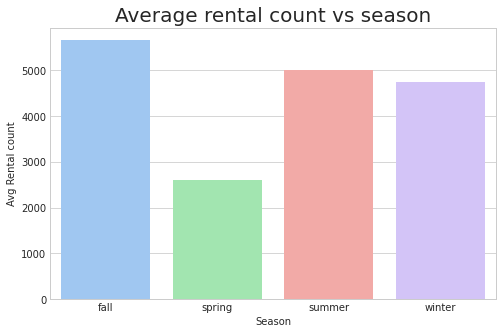

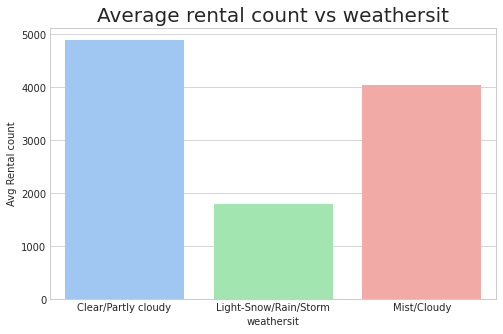

In [289]:
# season vs rental count
dist1 = bike_df.groupby(by='season').cnt.mean()
distribution(data=dist1, title = 'Average rental count vs season', x_label = 'Season', y_label='Avg Rental count')

# weathersit vs rental count
dist2 = bike_df.groupby(by='weathersit').cnt.mean()
distribution(data=dist2, title = 'Average rental count vs weathersit', x_label = 'weathersit', y_label='Avg Rental count')

#### Inference :

**Plot 1 :** Highest rental counts during fall season and lowest during sprimg season
    
**Plot 2 :** Highest rental counts during weather pattern clear/partly cloudy and lowest during light snow/rain/storm

<a id="4"></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">4. Dummy Variable Creation</p>

**Steps :**

1. **Creating dummy variables** for four major categorical variables :
    
    > mnth
    
    > weathersit
    
    > season
    
    > weekday
    
    
    
2. **Drop original categorical variables** once dummies have been created


3. **Drop the first value** for each of the dummy variables

In [17]:
new_bike = pd.get_dummies(new_bike, drop_first=True)
new_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                17379 non-null  int64  
 1   holiday                           17379 non-null  int64  
 2   workingday                        17379 non-null  int64  
 3   temp                              17379 non-null  float64
 4   atemp                             17379 non-null  float64
 5   hum                               17379 non-null  float64
 6   windspeed                         17379 non-null  float64
 7   cnt                               17379 non-null  int64  
 8   season_spring                     17379 non-null  uint8  
 9   season_summer                     17379 non-null  uint8  
 10  season_winter                     17379 non-null  uint8  
 11  mnth_2                            17379 non-null  uint8  
 12  mnth

In [18]:
new_bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear/Partly cloudy,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
0,0,0,0,0.24,0.2879,0.81,0.0,16,1,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0.22,0.2727,0.80,0.0,40,1,0,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0.22,0.2727,0.80,0.0,32,1,0,...,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0.24,0.2879,0.75,0.0,13,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0.24,0.2879,0.75,0.0,1,1,0,...,0,0,1,0,0,0,0,1,0,0


In [19]:
new_bike.shape

(17379, 31)

Row count pre split : 730
    
Column vount pre split : 30


<a id="1"></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">5. Split Data : Train and Test</p>

Splitting the entire data set in the two parts using train_test_split method from SKLEARN library in the ratio of 80:20 :
    
   **TRAIN : 80%**
    
   **TEST : 20%**

In [20]:
## In order to ensure both train and test parts have the same number of rows, we need to specify random_state
## using random.seed() from numpy to implement this.

np.random.seed(0)
bike_train, bike_test = train_test_split(new_bike, train_size = 0.8, test_size = 0.2, random_state = 43)

In [21]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13903 entries, 1823 to 14148
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                13903 non-null  int64  
 1   holiday                           13903 non-null  int64  
 2   workingday                        13903 non-null  int64  
 3   temp                              13903 non-null  float64
 4   atemp                             13903 non-null  float64
 5   hum                               13903 non-null  float64
 6   windspeed                         13903 non-null  float64
 7   cnt                               13903 non-null  int64  
 8   season_spring                     13903 non-null  uint8  
 9   season_summer                     13903 non-null  uint8  
 10  season_winter                     13903 non-null  uint8  
 11  mnth_2                            13903 non-null  uint8  
 12  m

#### 5.1 Inspect dataset post split

In [22]:
bike_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3476 entries, 3124 to 3138
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                3476 non-null   int64  
 1   holiday                           3476 non-null   int64  
 2   workingday                        3476 non-null   int64  
 3   temp                              3476 non-null   float64
 4   atemp                             3476 non-null   float64
 5   hum                               3476 non-null   float64
 6   windspeed                         3476 non-null   float64
 7   cnt                               3476 non-null   int64  
 8   season_spring                     3476 non-null   uint8  
 9   season_summer                     3476 non-null   uint8  
 10  season_winter                     3476 non-null   uint8  
 11  mnth_2                            3476 non-null   uint8  
 12  mnt

In [23]:
bike_train.shape

(13903, 31)

As 80% of 730 = 584

In [297]:
bike_test.shape

(147, 30)

As 20 % of 730 = 146

#### 5.2 Check the correlation among all variables (after adding dummies)



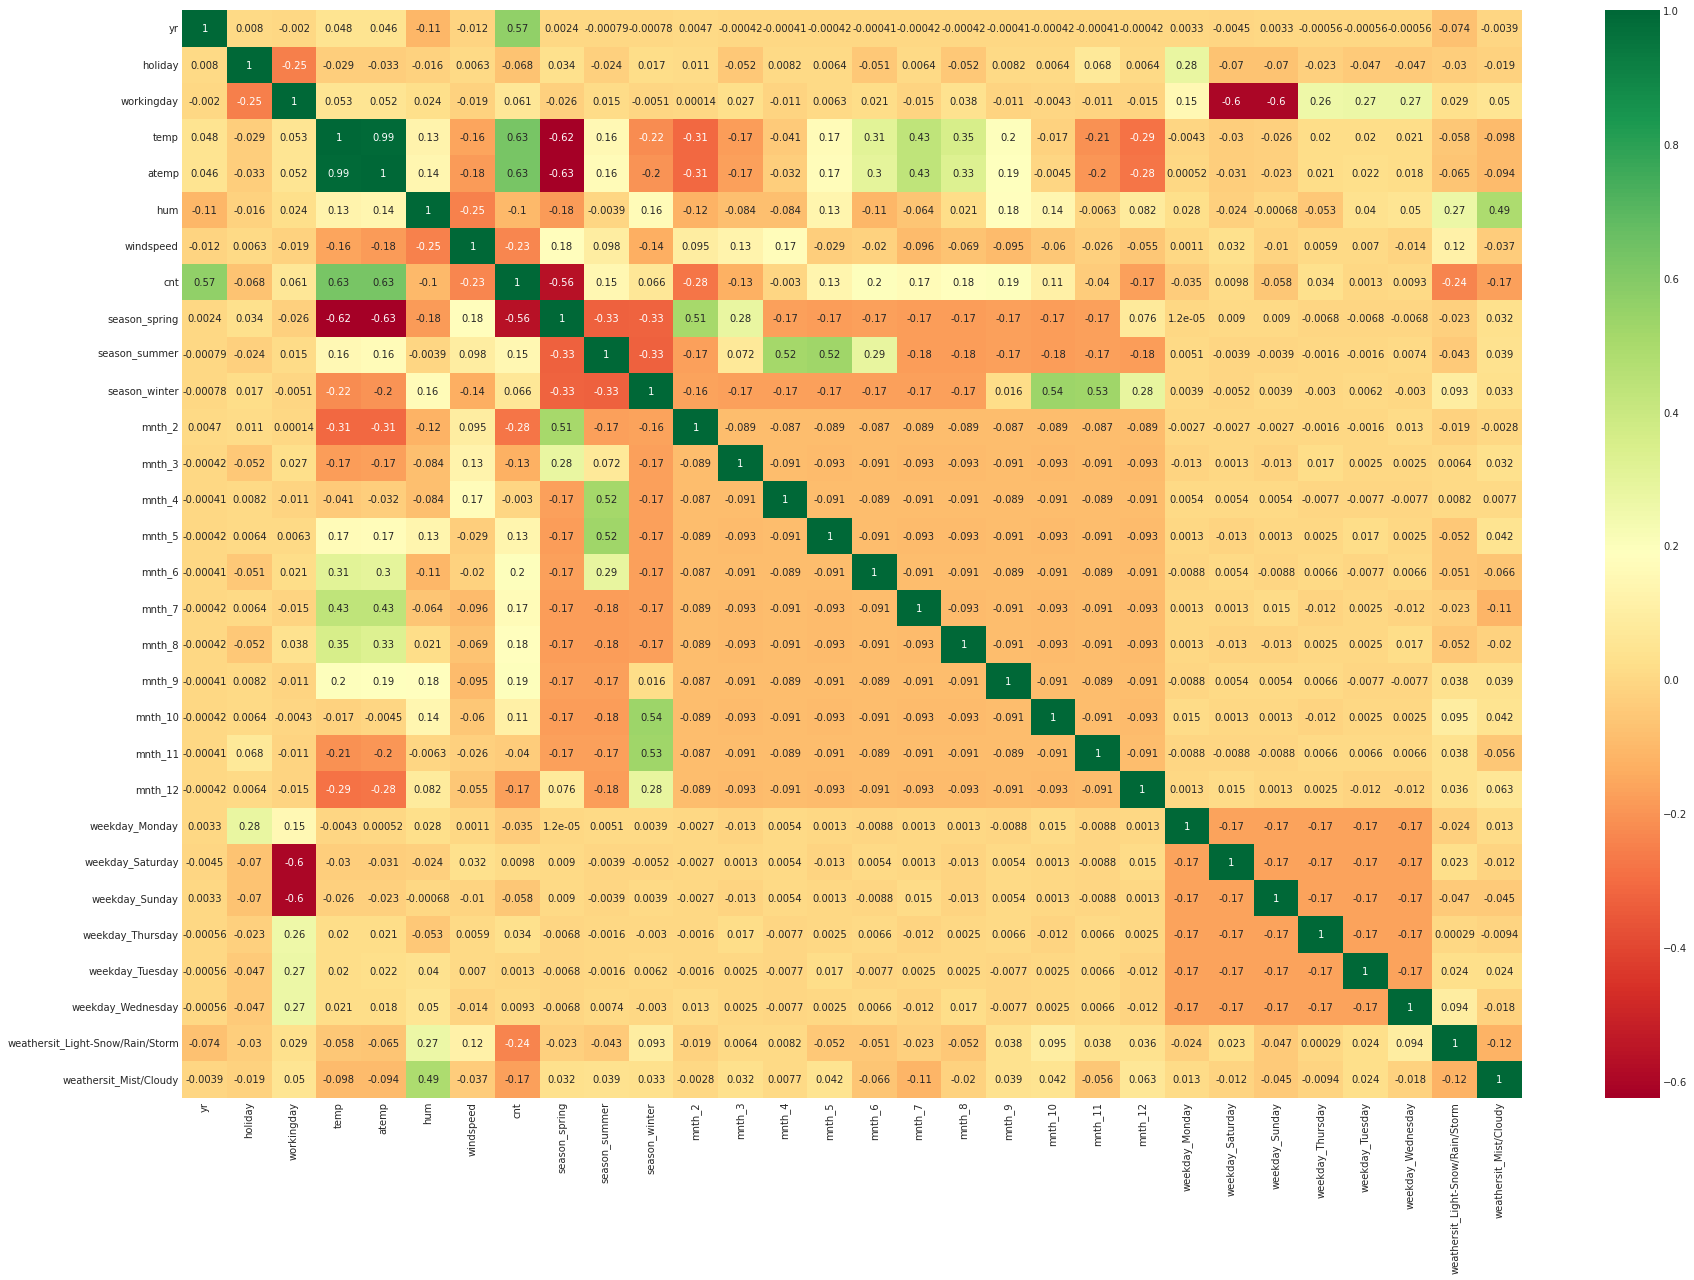

In [298]:
plt.figure(figsize = (30,20))
sns.heatmap(new_bike.corr(), annot = True, cmap = "RdYlGn")
plt.show()

#### Inferences :

   - Variables having a **high collinearity with target variable 'cnt'** :
        
        atemp (0.63)
        
        yr  (0.57)
        
        season spring (-0.56)
        
        
        
        
        
   - Variables having a **high to moderate collinearity with each other** :
        
        temp and atemp (0.99)
        
        hum and weathersit_Mist/Cloudy  (0.49)
        
        season_winter and mnth_10 (0.54), mnth_11  (0.53)
        
        season_summer and mnth_4 (0.54), mnth_5  (0.54)
        
        atemp and mnth_7  (0.43)
        
        mnth_2 and season_spring (0.5)
    
        

<a id="1"></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">5. Feature Scaling</p>

In [24]:
scale =  MinMaxScaler()

In [25]:
# before rescaling
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Clear/Partly cloudy,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
1823,0,0,1,0.54,0.5152,0.64,0.2537,272,0,1,...,0,1,0,0,0,0,0,0,0,1
13153,1,0,0,0.74,0.7121,0.74,0.1045,31,0,0,...,0,0,1,0,0,0,0,1,0,0
191,0,0,0,0.10,0.0909,0.49,0.2836,1,1,0,...,0,0,0,1,0,0,0,1,0,0
12518,1,0,0,0.82,0.7121,0.28,0.2836,375,0,1,...,0,0,0,1,0,0,0,1,0,0
8199,0,0,1,0.16,0.1667,0.80,0.1642,223,0,0,...,1,0,0,0,0,1,0,1,0,0


In [301]:
# Apply scaler on the numerical variables of train dataset

bike_num = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_train[bike_num] = scale.fit_transform(bike_train[bike_num])

In [302]:
#post rescaling
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.484589,0.030822,0.678082,0.540289,0.515927,0.524983,0.397403,0.521448,0.244863,0.256849,...,0.089041,0.082192,0.135274,0.148973,0.142123,0.143836,0.143836,0.143836,0.020548,0.344178
std,0.500191,0.172983,0.467612,0.227872,0.213594,0.190433,0.182138,0.224593,0.430375,0.437270,...,0.285047,0.274892,0.342309,0.356367,0.349476,0.351224,0.351224,0.351224,0.141987,0.475507
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.338295,0.328148,0.384281,0.266682,0.364028,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.547268,0.533046,0.527552,0.376825,0.523497,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740665,0.694260,0.667633,0.495899,0.686511,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [303]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
678,1,0,1,0.376975,0.362738,0.399071,0.458443,0.699637,0,0,...,1,0,0,0,0,0,0,0,0,0
647,1,0,1,0.482890,0.471292,0.706497,0.400572,0.746514,0,0,...,0,0,0,0,0,0,1,0,0,1
516,1,0,1,0.773634,0.724915,0.332367,0.412450,0.857377,0,1,...,0,0,0,0,0,1,0,0,0,0
683,1,0,1,0.286637,0.265800,0.414732,0.422818,0.641392,0,0,...,1,0,0,0,0,0,0,1,0,0
537,1,0,1,0.930428,0.884023,0.436775,0.229966,0.689441,0,0,...,0,0,0,0,0,1,0,0,0,0



<a id="1"></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">6. Build Linear Model</p>

We will make use of **RFE and LinearRegression libraries** from sklearn for implementing Linear Regression using Recurssive feature elimination

We need 2 variables in order to build a model : X and Y
    
    Y : Target variable (dependent)
    X : Predictor variables (independent)
        
We have around 28 columns (variables), excluding the target variable. Since it isn't easy to analyse all these predictors, will consider **15 variables** to start with.

**RFE** method shall be used here to which we will provide the arbitrarily chosen 15 predictors (as 1, and others as 0).

### 6.1 Feature selection using RFE

In [26]:
# creating y variable to hold our taget variable : cnt
y = bike_train.pop('cnt')

In [27]:
x = bike_train

In [28]:
lr = LinearRegression()

In [29]:
# using Linearregression().fit() in order to get the right fitting model

lr.fit(x, y)

LinearRegression()

In [30]:
#Apply RFE with 15 output variables

r = RFE(lr, n_features_to_select = 15)

In [31]:
#using Linearregression().fit() in order to get the right fitting model
r = r.fit(x, y)

In [32]:
#creating a new dataframe to store columns along with their respective ranks and support values (status) 

r_bike = pd.DataFrame ({'Predictors' : x.columns, 'Status' : r.support_, 'Rank' : r.ranking_})

In [33]:
r_bike.sort_values(by = 'Rank')

,Predictors,Status,Rank
0,yr,True,1
27,weathersit_Clear/Partly cloudy,True,1
23,weekday_Sunday,True,1
22,weekday_Saturday,True,1
16,mnth_8,True,1
15,mnth_7,True,1
28,weathersit_Light-Snow/Rain/Storm,True,1
9,season_winter,True,1
14,mnth_6,True,1
29,weathersit_Mist/Cloudy,True,1


#### Now we have our 15 chosen predictors evaluated by RFE.

The ones ranked as 1 are the top predictors which will have a major impact on the outcome.

**However, it is not a good practice to fully rely on this and hence we must validate this further using different models and eliminate the features that aren't required or doesn't satify a given criteria.**

In [34]:
## we now create a new general function for further calculating the VIF (variance inflation factor) for our models.

def get_vif(df):
    vif_pred =  pd.DataFrame()
    vif_pred['Predictors']  = df.columns
    
    vif_pred['VIF_Value'] = [variance_inflation_factor(df.values, v) for v in range(df.shape[1])]
    vif_pred['VIF_Value'] = round(vif_pred['VIF_Value'], 2) 
    
    vif_pred = vif_pred.sort_values(by = 'VIF_Value', ascending = False)
    vif_pred = vif_pred.reset_index(drop=True)
    return vif_pred

### 6.2 Model building using STATS MODEL

We will use StatsModel now in order to build different models

#### 6.2.1  MODEL-1

In [35]:
## VIF 

get_vif(x)

,Predictors,VIF_Value
0,workingday,3253.74
1,weathersit_Clear/Partly cloudy,1048.98
2,weathersit_Mist/Cloudy,902.65
3,weekday_Saturday,681.79
4,weekday_Sunday,678.64
5,weathersit_Light-Snow/Rain/Storm,341.26
6,holiday,143.31
7,temp,53.54
8,atemp,46.93
9,season_spring,10.17


In [36]:
#extracting all columns with "True" status, i.e RFE selected variables and storing them in new_col

new_col = x.columns[r.support_]
new_col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'season_winter',
       'mnth_6', 'mnth_7', 'mnth_8', 'weekday_Saturday', 'weekday_Sunday',
       'weathersit_Clear/Partly cloudy', 'weathersit_Light-Snow/Rain/Storm',
       'weathersit_Mist/Cloudy'],
      dtype='object')

In [37]:
#checking out variables/columns rejected by RFE
x.columns[~r.support_]


Index(['windspeed', 'season_spring', 'season_summer', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_Monday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

In [38]:
# creating a new dataframe x_rfe with RFE selected variables

x_rfe = x[new_col]

In [39]:
# create Model-1

#adding constant
x_lr1 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m1 = sm.OLS(y, x_lr1).fit()

In [40]:
# check the obtained parameters from first generated model

lr_m1.params

const                               138.782449
yr                                   73.698639
holiday                               8.195407
workingday                           45.289735
temp                                389.294110
atemp                               114.263799
hum                                -287.406795
season_winter                        52.428491
mnth_6                              -58.794951
mnth_7                              -97.811347
mnth_8                              -56.576165
weekday_Saturday                     48.231497
weekday_Sunday                       37.065810
weathersit_Clear/Partly cloudy      -95.039789
weathersit_Light-Snow/Rain/Storm    -99.520129
weathersit_Mist/Cloudy              -83.767767
dtype: float64

In [41]:
## Get the summary of linear regression result for model 1

print(lr_m1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     507.8
Date:                Sun, 24 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:13:34   Log-Likelihood:                -89146.
No. Observations:               13903   AIC:                         1.783e+05
Df Residuals:                   13888   BIC:                         1.784e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

#### Inferences :

- Highest VIF value variables : atemp (p-val = 0.007) and temp (p-val = 0.331)
    
- p-val > 0.05 variables : temp(0.331) and holiday(0.417)
    
- R-squared : 0.848
    
- Adj-R squared : 0.845

    
**As "temp" variable is common for both, VIF > 5 and p-val > 0.05, it needs to be dropped**

### 6.2.2 MODEL-2

We proceed after removing **temp due to it's high VIF as well as p-val > 0.05** and redesigning the model

In [42]:
new_col = new_col.drop(['temp'])
x_rfe = x[new_col]

In [43]:
## VIF

get_vif(x_rfe)

,Predictors,VIF_Value
0,workingday,3191.65
1,weathersit_Clear/Partly cloudy,1046.71
2,weathersit_Mist/Cloudy,900.84
3,weekday_Saturday,669.84
4,weekday_Sunday,666.63
5,weathersit_Light-Snow/Rain/Storm,340.56
6,holiday,140.30
7,atemp,1.72
8,mnth_7,1.46
9,mnth_8,1.35


In [44]:
# create Model-2

#adding constant
x_lr2 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m2 = sm.OLS(y, x_lr2).fit()

In [45]:
# check the obtained parameters from second generated model

lr_m2.params

const                               140.746133
yr                                   74.023450
holiday                              10.688312
workingday                           45.347477
atemp                               531.085609
hum                                -295.860045
season_winter                        50.666899
mnth_6                              -52.217943
mnth_7                              -90.812974
mnth_8                              -45.622981
weekday_Saturday                     48.269165
weekday_Sunday                       36.441178
weathersit_Clear/Partly cloudy      -98.969043
weathersit_Light-Snow/Rain/Storm    -99.639402
weathersit_Mist/Cloudy              -86.705800
dtype: float64

In [46]:
## Get the summary of linear regression result for model 2

print(lr_m2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     537.9
Date:                Sun, 24 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:13:39   Log-Likelihood:                -89185.
No. Observations:               13903   AIC:                         1.784e+05
Df Residuals:                   13889   BIC:                         1.785e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

#### Inferences :

- Highest VIF value variables :  and atemp 
    
- p-val < 0.05 for all variables 
    
- R-squared : 0.838
    
- Adj-R squared : 0.834

    
**As all p-values are within limits we will drop hum due to it's high VIF**

### 6.2.3 MODEL-3

We now proceed after removing **holiday** due giving a priority to p-val : 0.426


In [325]:
new_col = new_col.drop(['hum'])
x_rfe = x[new_col]

In [326]:
## VIF 

get_vif(x_rfe)

,Predictors,VIF_Value
0,atemp,7.01
1,windspeed,5.13
2,workingday,4.58
3,season_winter,2.44
4,season_spring,2.00
5,yr,1.95
6,mnth_11,1.77
7,weekday_Saturday,1.76
8,weathersit_Mist/Cloudy,1.57
9,mnth_7,1.38


In [327]:
# create Model-3

#adding constant
x_lr3 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m3 = sm.OLS(y, x_lr3).fit()

In [328]:
# check the obtained parameters from third generated model

lr_m3.params

const                               0.259854
yr                                  0.239300
workingday                          0.049967
atemp                               0.396396
windspeed                          -0.082371
season_spring                      -0.153715
season_winter                       0.066589
mnth_7                             -0.052094
mnth_9                              0.060687
mnth_11                            -0.066631
mnth_12                            -0.057989
weekday_Saturday                    0.045770
weathersit_Light-Snow/Rain/Storm   -0.299250
weathersit_Mist/Cloudy             -0.086540
dtype: float64

In [329]:
## Get the summary of linear regression result for model 3

print(lr_m3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     215.4
Date:                Mon, 02 May 2022   Prob (F-statistic):          4.52e-210
Time:                        06:45:00   Log-Likelihood:                 562.97
No. Observations:                 584   AIC:                            -1098.
Df Residuals:                     570   BIC:                            -1037.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

#### Inferences :

- Highest VIF value variables : workingday (13.06) and hum (14.13)
    
- p-val > 0.05 variables :  weekday_Sunday(0.154)
    
- R-squared : 0.848
    
- Adj-R squared : 0.845

    
**As p-val holds a priority than VIF, for "weekday_Sunday" it is still at the border mark of 5 and infact increased, it needs to be dropped**

### 6.2.4 MODEL-4

We will now drop **weekday_Sunday, due to it's high p-val : 0.154** and redesigning the model

In [330]:
new_col = new_col.drop(['windspeed'])
x_rfe = x[new_col]

In [331]:
## VIF 

get_vif(x_rfe)

,Predictors,VIF_Value
0,atemp,5.30
1,workingday,4.48
2,season_winter,2.44
3,yr,1.94
4,mnth_11,1.74
5,weekday_Saturday,1.73
6,season_spring,1.62
7,weathersit_Mist/Cloudy,1.56
8,mnth_7,1.35
9,mnth_12,1.35


In [332]:
# create Model-4

#adding constant
x_lr4 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m4 = sm.OLS(y, x_lr4).fit()

In [333]:
# check the obtained parameters from fourth generated model

lr_m4.params

const                               0.218972
yr                                  0.238590
workingday                          0.050175
atemp                               0.408106
season_spring                      -0.154239
season_winter                       0.072317
mnth_7                             -0.048759
mnth_9                              0.066263
mnth_11                            -0.067701
mnth_12                            -0.052415
weekday_Saturday                    0.045805
weathersit_Light-Snow/Rain/Storm   -0.310903
weathersit_Mist/Cloudy             -0.086062
dtype: float64

In [334]:
## Get the summary of linear regression result for model 4

print(lr_m4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     227.2
Date:                Mon, 02 May 2022   Prob (F-statistic):          2.44e-208
Time:                        06:45:00   Log-Likelihood:                 556.05
No. Observations:                 584   AIC:                            -1086.
Df Residuals:                     571   BIC:                            -1029.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

#### Inferences :

- Highest VIF value variables : hum (11.86) and atemp (9.38)
    
- p-val > 0.05 variables :  Nome
    
- R-squared : 0.848
    
- Adj-R squared : 0.844

    
**As there isn't any variable with  p-val > 0.05, VIF > 5 shall be considered and hence "hum" needs to be dropped**

### 6.2.5 MODEL-5

We will now drop **mnth_7**, and redesigning the model

In [335]:
new_col = new_col.drop(['mnth_7'])
x_rfe = x[new_col]

In [336]:
## VIF 

get_vif(x_rfe)

,Predictors,VIF_Value
0,atemp,4.46
1,workingday,4.44
2,season_winter,2.40
3,yr,1.93
4,mnth_11,1.74
5,weekday_Saturday,1.72
6,season_spring,1.61
7,weathersit_Mist/Cloudy,1.54
8,mnth_12,1.35
9,mnth_9,1.17


In [337]:
# create Model-5

#adding constant
x_lr5 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m5 = sm.OLS(y, x_lr5).fit()

In [338]:
# check the obtained parameters from fifth generated model

lr_m5.params

const                               0.231801
yr                                  0.239119
workingday                          0.050964
atemp                               0.374133
season_spring                      -0.158614
season_winter                       0.073944
mnth_9                              0.074090
mnth_11                            -0.070176
mnth_12                            -0.055448
weekday_Saturday                    0.046340
weathersit_Light-Snow/Rain/Storm   -0.313912
weathersit_Mist/Cloudy             -0.084457
dtype: float64

In [339]:
## Get the summary of linear regression result for model 5

print(lr_m5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     243.8
Date:                Mon, 02 May 2022   Prob (F-statistic):          1.14e-207
Time:                        06:45:00   Log-Likelihood:                 551.62
No. Observations:                 584   AIC:                            -1079.
Df Residuals:                     572   BIC:                            -1027.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

#### Inferences :

- Highest VIF value variables : atemp (5.79) and windspeed (4.80)
    
- p-val > 0.05 variables :  Nome, but **mnth_5 has a comparatively higher p-val (0.31) than others**
    
- R-squared : 0.848
    
- Adj-R squared : 0.844

    
**As there isn't any variable with  p-val > 0.05, we can either drop VIF > 5 i.e atemp or mnth_5. Considering "atemp" could be an important predictor variable for our analysis, we keep it and drop mnth_5**

### 6.2.6 MODEL-6

We will now drop **mnth_11**, due to it's high VIF and redesigning the model.

**Note :** even though atemp has higher vif than 5, it could be a crucial factor, for our model


In [340]:
new_col = new_col.drop(['mnth_11'])
x_rfe = x[new_col]

In [341]:
## VIF 

get_vif(x_rfe)

,Predictors,VIF_Value
0,atemp,4.45
1,workingday,4.44
2,yr,1.92
3,weekday_Saturday,1.72
4,season_spring,1.61
5,season_winter,1.56
6,weathersit_Mist/Cloudy,1.54
7,mnth_12,1.23
8,mnth_9,1.15
9,weathersit_Light-Snow/Rain/Storm,1.05


In [342]:
# create Model-6

#adding constant
x_lr6 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m6 = sm.OLS(y, x_lr6).fit()

In [343]:
# check the obtained parameters from sixth generated model

lr_m6.params

const                               0.213346
yr                                  0.238169
workingday                          0.052298
atemp                               0.398062
season_spring                      -0.151545
season_winter                       0.050162
mnth_9                              0.081675
mnth_12                            -0.035173
weekday_Saturday                    0.047918
weathersit_Light-Snow/Rain/Storm   -0.317027
weathersit_Mist/Cloudy             -0.081017
dtype: float64

In [344]:
## Get the summary of linear regression result for model 6

print(lr_m6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     260.0
Date:                Mon, 02 May 2022   Prob (F-statistic):          1.45e-205
Time:                        06:45:00   Log-Likelihood:                 543.79
No. Observations:                 584   AIC:                            -1066.
Df Residuals:                     573   BIC:                            -1018.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

**Inference**

This looks a fairly nice model as our **R-squared value is 0.819 and Adjusted R squared is 0.816**. But let us try to optimise it further and see if few other less significant variables can be dropped


- Highest VIF value variables : atemp (5.63) and windspeed (4.80)
    
- p-val > 0.05 variables :  Nome
    

    
**As there isn't any variable with  p-val > 0.05, VIF > 5 shall be considered. We can't drop atemp due to it's probable high significance**, hence we will proceed with **dropping weekday_Saturday** as it is almost equals 5


### 6.2.7 MODEL-7

We will now drop **weekday_Saturday** due it's borderline VIF value with 5

In [345]:
new_col = new_col.drop(['weekday_Saturday'])
x_rfe = x[new_col]

In [346]:
## VIF 

get_vif(x_rfe)

,Predictors,VIF_Value
0,atemp,3.31
1,workingday,3.01
2,yr,1.92
3,weathersit_Mist/Cloudy,1.52
4,season_winter,1.51
5,season_spring,1.45
6,mnth_12,1.22
7,mnth_9,1.15
8,weathersit_Light-Snow/Rain/Storm,1.04


In [347]:
# create Model-7

#adding constant
x_lr7 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m7 = sm.OLS(y, x_lr7).fit()

In [348]:
# check the obtained parameters from seventh generated model

lr_m7.params

const                               0.235323
yr                                  0.237746
workingday                          0.030007
atemp                               0.397798
season_spring                      -0.151647
season_winter                       0.049330
mnth_9                              0.080995
mnth_12                            -0.032222
weathersit_Light-Snow/Rain/Storm   -0.313602
weathersit_Mist/Cloudy             -0.079295
dtype: float64

In [349]:
## Get the summary of linear regression result for model 7

print(lr_m7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     282.5
Date:                Mon, 02 May 2022   Prob (F-statistic):          2.41e-204
Time:                        06:45:00   Log-Likelihood:                 538.00
No. Observations:                 584   AIC:                            -1056.
Df Residuals:                     574   BIC:                            -1012.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

**Inference**

Our **R-squared value slightly dropped to 0.836 from 0.840 and Adjusted R squared to 0.833 from 0.837**. 

- Highest VIF value variables : None
    
- p-val > 0.05 : None
    

    
**As there isn't any variable with  p-val > 0.05, VIF > 5 shall be considered. We can't drop atemp due to it's probable high significance, hence are left with 2 options :

    1. Consider this as our final model
    2. Drop mnth_12 due to its low significance
    
**Let us consider option 2 and see how it affects our model**


### 6.2.8 MODEL-8

We will ow drop **mnth_12** due to it's low significance

In [350]:
new_col = new_col.drop(['mnth_12'])
x_rfe = x[new_col]

In [351]:
## VIF 

get_vif(x_rfe)

,Predictors,VIF_Value
0,atemp,3.30
1,workingday,3.01
2,yr,1.92
3,weathersit_Mist/Cloudy,1.51
4,season_spring,1.40
5,season_winter,1.37
6,mnth_9,1.15
7,weathersit_Light-Snow/Rain/Storm,1.04


In [352]:
# create Model-8

#adding constant
x_lr8 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m8 = sm.OLS(y, x_lr8).fit()

In [353]:
# check the obtained parameters from eighth generated model

lr_m8.params

const                               0.229225
yr                                  0.237500
workingday                          0.030172
atemp                               0.406721
season_spring                      -0.152258
season_winter                       0.044916
mnth_9                              0.082394
weathersit_Light-Snow/Rain/Storm   -0.310032
weathersit_Mist/Cloudy             -0.079526
dtype: float64

In [354]:
## Get the summary of linear regression result for model 8

print(lr_m8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     315.4
Date:                Mon, 02 May 2022   Prob (F-statistic):          1.08e-204
Time:                        06:45:00   Log-Likelihood:                 535.85
No. Observations:                 584   AIC:                            -1054.
Df Residuals:                     575   BIC:                            -1014.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

**Inference**

Our **R-squared value again slightly dropped to 0.814 and Adjusted R squared to 0.812**.  However, a classic result achieved for the VIF values.

**VIF for all variables dropped below 2.5. We already know, lower the VIF, better the model.**


- VIF > 5  variables : None
    
- p-val > 0.05   : none

workingday is the only var with non zero p-val. It also has low significance. So we can drop it.

  


### 6.2.9 MODEL-9

We drop **workingday** due to it's very high p-val 

In [355]:
new_col = new_col.drop(['workingday'])
x_rfe = x[new_col]

In [356]:
## VIF 

get_vif(x_rfe)

,Predictors,VIF_Value
0,atemp,2.19
1,yr,1.92
2,weathersit_Mist/Cloudy,1.49
3,season_winter,1.30
4,season_spring,1.26
5,mnth_9,1.14
6,weathersit_Light-Snow/Rain/Storm,1.03


In [357]:
# create Model-9

#adding constant
x_lr9 = sm.add_constant(x_rfe)

#creating a fitted model using fit()
lr_m9 = sm.OLS(y, x_lr9).fit()

In [358]:
# check the obtained parameters from ninth generated model

lr_m9.params

const                               0.244843
yr                                  0.237354
atemp                               0.413310
season_spring                      -0.150225
season_winter                       0.046886
mnth_9                              0.079031
weathersit_Light-Snow/Rain/Storm   -0.306459
weathersit_Mist/Cloudy             -0.077437
dtype: float64

In [359]:
## Get the summary of linear regression result for model 9

print(lr_m9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     352.0
Date:                Mon, 02 May 2022   Prob (F-statistic):          2.17e-203
Time:                        06:45:01   Log-Likelihood:                 529.78
No. Observations:                 584   AIC:                            -1044.
Df Residuals:                     576   BIC:                            -1009.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

### Inferences :

Woah! No change at all in R-squared and Adjusted R-squared

> Finally we have the **p value of all variables exactly equal to zero. Yay!**

> Also, **R-squared and adjusted R-squared values remained the same** i.e 0.811 and 0.808 respectively (difference = 0.003)
    
> So we **removed an additional variable without any compromise to R squared value.** This indeed is a rare to achieve

> **The VIF values of all variables are also below 2.5** which is an equally good indicator for a significant model**


**Will consider this as our final model unless our Test data shows metrics significantly different than above (trained model)**



# <p style="background-color:turquoise;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">7. Final Model Validation</p>

**Final model has :**
    
    Number of variables : 7 
        
    R-squared : 0.811
        
    Adjusted R-squared : 0.808
        
    p-val : 0.0000 for all variables
        
    VIF : Below 2.5 for all variables

### 7.1  Coefficient Analysis


#### Coefficient values for final model variables are :


    
> **const**                                            0.2448

> **yr**                                               0.2373

> **atemp**                                            0.4133

> **season_spring**                                   -0.1502

> **mnth_9**                                           0.0790

> **season_winter**                                    0.0468

> **weathersit_Light-Snow/Rain/Storm**                -0.3064

> **weathersit_Mist/Cloudy**                          -0.0774


### Inferences :


1. **yr :** It has coefficient value **0.2373**. Hence, a unit increase in yr will increase the number of hired bikes by 0.2543 units
    

2. **atemp :** It has coefficient value **0.4133**. Hence, a unit increase in atemp will increase the number of hired bikes by 0.3958 units


3. **season_spring :** It has coefficient value **-0.1502**. Hence, a unit increase in season_spring will decrease the number of hired bikes by 0.1645 units

    
4. **mnth_9 :** It has coefficient value **0.0790**. Hence, a unit increase in mnth_9 will increase the number of hired bikes by 0.0914 units


5. **season_winter** : It has coefficient value **0.0468**. Hence, a unit increase in season_winter will increase the number of hired bikes by 0.0810 units


6. **weathersit_Light-Snow/Rain/Storm** : It has coefficient value **-0.3064**. Hence, a unit increase in weathersit_Light-Snow/Rain/Storm will decrease the number of hired bikes by -0.3064 units


7. **weathersit_Mist/Cloudy :** It has coefficient value **-0.0774**. Hence, a unit increase in weathersit_Mist/Cloudy will decrease the number of hired bikes by -0.0774 units
    


### 7.2 Hypothesis Testing

**H0 (null hypothesis) :** All coefficients = 0, i.e B0, B1, ... Bi = 0
    
**H1 (alternate hypothesis)** : At least one of the coefficient must be non-zero

#### Inference :

**None of the coefficient for our final model variables equals zero, we will reject the null hypothesis**

### Equation of best fit as per model 7


**cnt** = 0.244843 + (yr x 0.237354) + (atemp x 0.413310) - (season_spring x-0.150225) + (mnth_9 x 0.0914) + (season_winter x 0.046886) - (weathersit_Light-Snow/Rain/Storm x -0.306459) - (weathersit_Mist/Cloudy x -0.077437)

# <p style="background-color:white;font-family:newtimeroman;font-size:120%;color:salmon;text-align:left;border-radius:20px 60px;">Linear Regression Assumptions</p>

**Five assumptions of Linear regression are :**


**1. Normality :** Error terms are normally distributed (around mean = 0) i.e, for any fixed value of X, Y is normally distributed.
    
    
**2. Linearity:** The relationship between X and the mean of Y is linear.
    
    
**3. No or little multicollinearity :** Observations are independent of each other.
      
    
**4. Homoscedasticity :** The variance of residual is the same for any value of X.
    
    
**5. No pattern or auto-correlation :** Error terms(residuals) are independent of predicted value.

### 7.3.1 Error terms are normally distributed  (around mean = 0)

In [360]:
# PERFORMING RESIDUAL ANALYSIS ON TRAINING DATA

y_pred =  lr_m9.predict(x_lr9)

<Figure size 432x288 with 0 Axes>

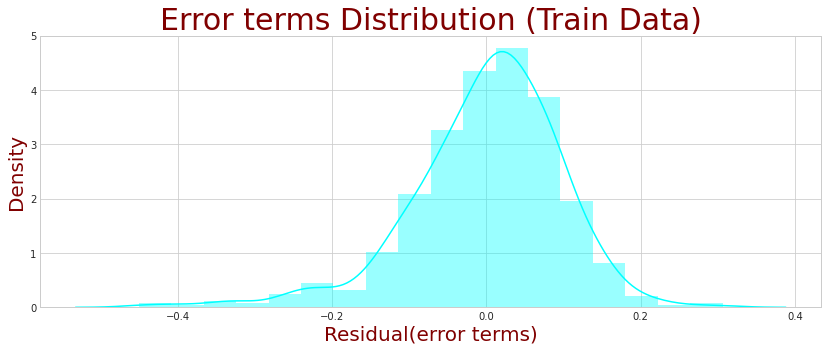

In [361]:
#plotting hist plot to analyse residuals

residual = y-y_pred

fig= plt.figure()
plt.figure(figsize = (14,5))
sns.distplot((residual), bins = 18, color='cyan')
plt.title('Error terms Distribution (Train Data)', fontsize=30,color='maroon')
plt.xlabel('Residual(error terms)', fontsize= 20,color='maroon')
plt.ylabel('Density', fontsize= 20,color='maroon')
plt.show()

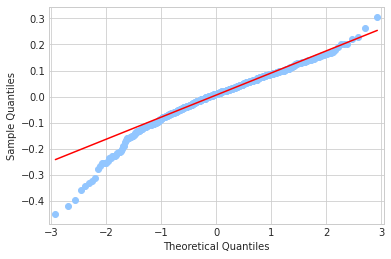

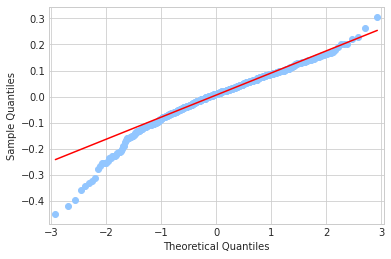

In [362]:
# Q-Q Plot : compare the residuals against normal distribution
sm.qqplot(residual, line='q')

#### Clearly the residuals are normally distributed around zero.

### 7.3.2 A linear relationship exists between X and Y
                                            

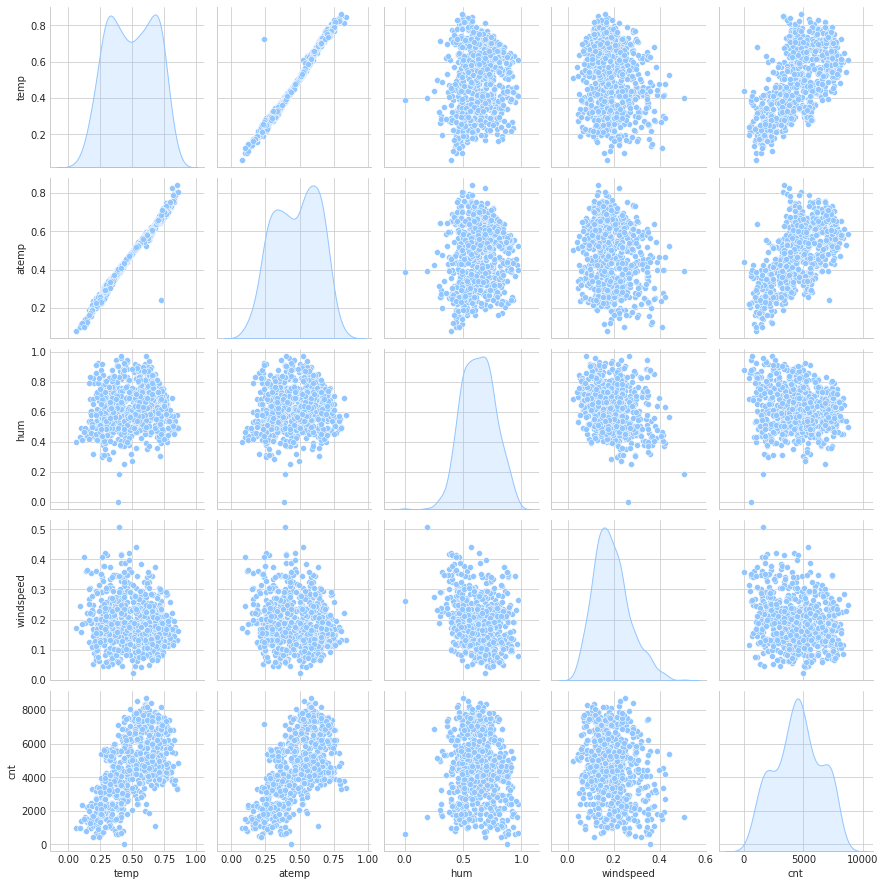

In [363]:
new_bike= new_bike[['temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(new_bike, diag_kind='kde')
plt.show()

#### Clearly, there is a linear relationship between the target variable cnt and couple of predictor variables temp and atemp. 

Other two, i.e hum and windspeed do not maintain a linear relationship with cnt. They are not part our Final model either.

### 7.3.3 There is no multicollinearity between predictor variables


In [364]:
get_vif(x_rfe)

,Predictors,VIF_Value
0,atemp,2.19
1,yr,1.92
2,weathersit_Mist/Cloudy,1.49
3,season_winter,1.30
4,season_spring,1.26
5,mnth_9,1.14
6,weathersit_Light-Snow/Rain/Storm,1.03


Based on the VIF valaues obtained from our final model :


**atemp**  2.19

**yr** 1.92

**season_spring**  1.26

**season_winter**  1.30

**weathersit_Mist/Cloudy** 1.49

**mnth_9**  1.14

**weathersit_Light-Snow/Rain/Storm**  1.03

    All the VIF values are clearly below the range of 5 and hence within permissible limits

### 7.3.4 Homoscedasticity : Equal distribution of residuals across predictor variables

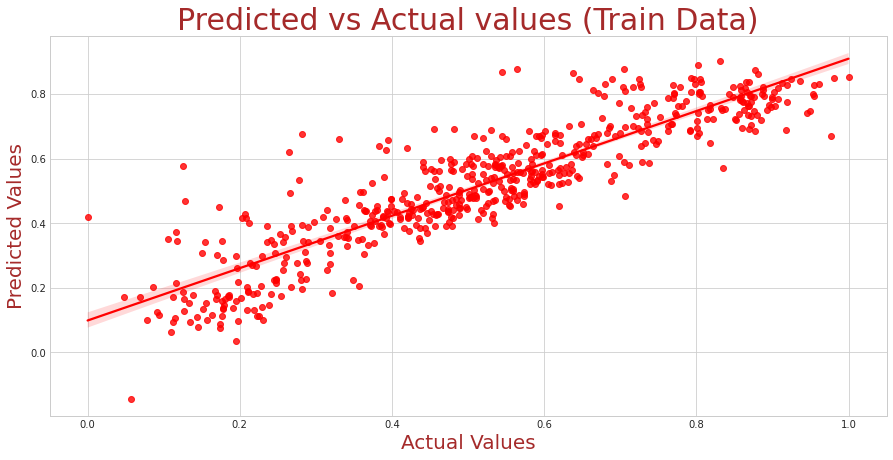

In [365]:
plt.figure(figsize = (15,7))
sns.regplot(x=y, y=y_pred, color='red')
plt.title ('Predicted vs Actual values (Train Data)' , fontsize=30, color='brown')
plt.xlabel("Actual Values", fontsize=20, color='brown')
plt.ylabel("Predicted Values", fontsize=20, color='brown')
plt.show()

#### Clearly the residuals seem to be equally distribted across the predicted value.

Hence, there exists an equal variance of residuals and we can be sure that there isn't any ambiguity or presence of high or low concentrated regions.

### 7.3.5 Error terms (residuals) are independent of predicted value.

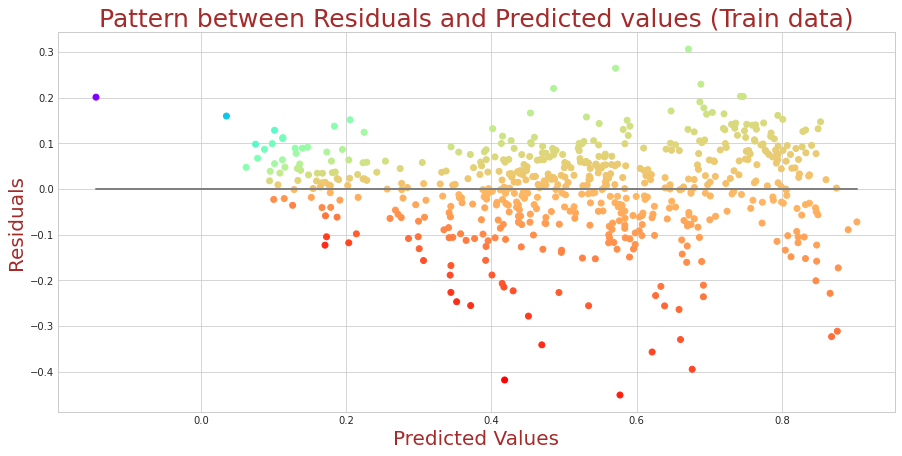

In [366]:
#test data
plt.figure(figsize = (15,7))

cmap=plt.cm.rainbow
#sns.regplot(x=y_pred, y=residual, color='orange')
x=y_pred
y=residual
plt.scatter(x, y, c= np.arctan2(x,y), cmap=cmap ,alpha = 1)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='grey')
plt.title ('Pattern between Residuals and Predicted values (Train data)' , fontsize=25, color= 'brown')
plt.xlabel("Predicted Values", fontsize=20, color= 'brown')
plt.ylabel("Residuals", fontsize=20, color= 'brown')
plt.show()


#### Clearly we don't see any pattern here as expected from our model. There is no specific relation between the residuals and predicted values 

Also, for this dataset, **the time series data might reflect autocorrelation as bike hire demand next year might depend on current year**. In such scenarios the regression model is likely to suffer due to autocorrelation.

As we know the **Durbin-Watson statistic is a test for autocorrelation** in a dataset, we have **Durbin-Watson statistic value : 1.874** and as it is slightly less than 2, this suggests there is a slight positive auto-correlation between some variables.
    
    
**NOTE : Durbin-Watson statistic value : 2 implies NO AUTOCORRELATION**


# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">8. Predict on Test Data</p>

We will now anlyse and make predictions based on our test data as per the final model

### 8.1 Apply scaler to test data 

In [367]:
#Using scalar() on all numeric variables of test dataset, in order to make sure info leak between train and test

bike_num = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[bike_num] = scale.transform(bike_test[bike_num])

In [368]:
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
607,1,0,1,0.806862,0.753071,0.468098,0.130555,0.901324,0,0,...,0,0,0,0,0,1,0,0,0,0
420,1,0,0,0.288713,0.231818,0.197215,0.952475,0.317591,1,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.836974,0.795348,0.577146,0.313059,0.830071,0,0,...,0,0,1,0,0,0,0,0,0,0
614,1,0,1,0.794402,0.756418,0.774362,0.286349,0.724364,0,0,...,0,0,0,0,0,1,0,0,0,1
408,1,0,1,0.203567,0.195377,0.218677,0.345661,0.398453,1,0,...,0,0,1,0,0,0,0,0,0,0


In [369]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_11,mnth_12,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,...,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,0.564626,0.020408,0.707483,0.556726,0.530533,0.501546,0.415371,0.540582,0.258503,0.231293,...,0.054422,0.095238,0.176871,0.122449,0.149660,0.136054,0.136054,0.136054,0.061224,0.312925
std,0.497501,0.141875,0.456474,0.229263,0.215491,0.226534,0.195397,0.236613,0.439309,0.423101,...,0.227624,0.294547,0.382864,0.328924,0.357957,0.344018,0.344018,0.344018,0.240561,0.465269
min,0.000000,0.000000,0.000000,0.046591,0.025950,-0.353829,0.083100,0.049103,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.378623,0.363307,0.345998,0.273110,0.392359,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.549345,0.542585,0.494200,0.379817,0.545529,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.766885,0.720772,0.652553,0.542986,0.726591,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.970925,0.927898,0.997100,1.157215,1.018634,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


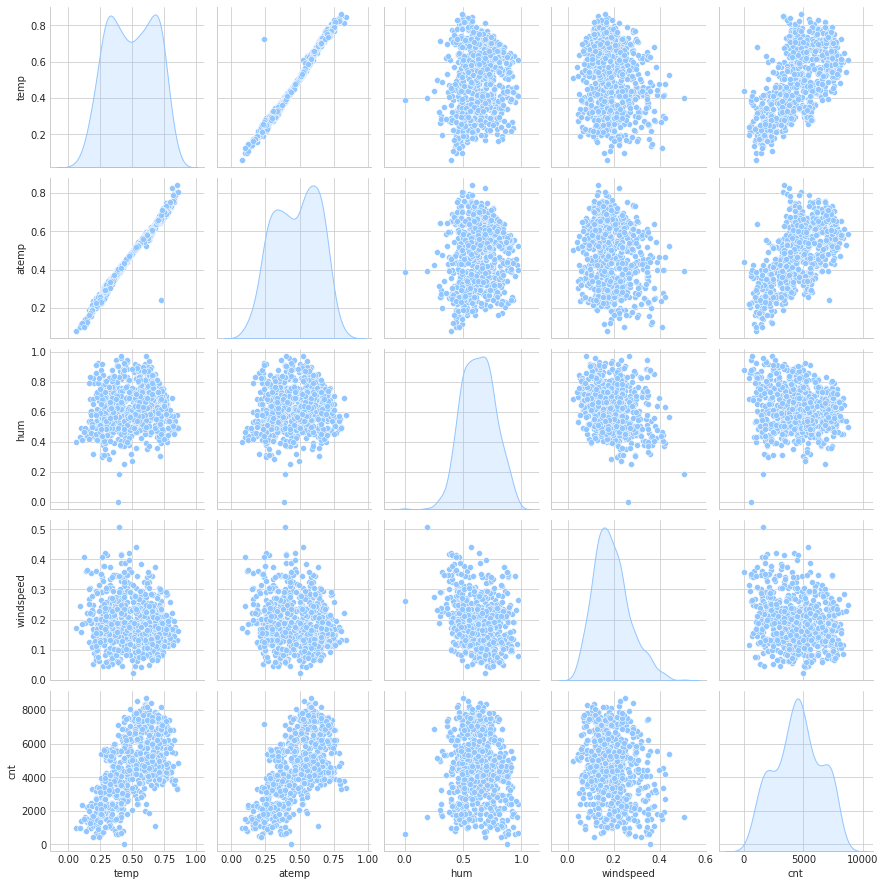

In [370]:
# ANALYZE NUMERICAL COULUMNS FOR TEST DATASET

bike_num = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[bike_num]
sns.pairplot(new_bike, diag_kind='kde')
plt.show()

#### There is a similar pattern as that of train data and bith, temp and atemp show a postive linear correlation with target variable 'cnt'.

#### Also, temp and atemp are multicollinear with each other.

### 8.2 Divide x_test and y_test

In [371]:
#setting up our target variable
y_test = bike_test.pop('cnt')

#setting up our test variables (features)
x_test= bike_test
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 607 to 310
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   yr                                147 non-null    int64  
 1   holiday                           147 non-null    int64  
 2   workingday                        147 non-null    int64  
 3   temp                              147 non-null    float64
 4   atemp                             147 non-null    float64
 5   hum                               147 non-null    float64
 6   windspeed                         147 non-null    float64
 7   season_spring                     147 non-null    uint8  
 8   season_summer                     147 non-null    uint8  
 9   season_winter                     147 non-null    uint8  
 10  mnth_2                            147 non-null    uint8  
 11  mnth_3                            147 non-null    uint8  
 12  mnth_4

In [372]:
## picking all variables which are part of our final model (filteringour required variables)

col_final = x_rfe.columns
x_test_new = x_test[col_final]
x_test_new

,yr,atemp,season_spring,season_winter,mnth_9,weathersit_Light-Snow/Rain/Storm,weathersit_Mist/Cloudy
607,1,0.753071,0,0,0,0,0
420,1,0.231818,1,0,0,0,0
576,1,0.795348,0,0,0,0,0
614,1,0.756418,0,0,1,0,1
408,1,0.195377,1,0,0,0,0
...,...,...,...,...,...,...,...
450,1,0.472129,0,0,0,0,0
414,1,0.245093,1,0,0,0,1
16,0,0.128246,1,0,0,0,1
651,1,0.409971,0,1,0,0,0


In [373]:
## Add a constant variable to test dataset

x_test_new = sm.add_constant(x_test_new)
x_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 607 to 310
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   const                             147 non-null    float64
 1   yr                                147 non-null    int64  
 2   atemp                             147 non-null    float64
 3   season_spring                     147 non-null    uint8  
 4   season_winter                     147 non-null    uint8  
 5   mnth_9                            147 non-null    uint8  
 6   weathersit_Light-Snow/Rain/Storm  147 non-null    uint8  
 7   weathersit_Mist/Cloudy            147 non-null    uint8  
dtypes: float64(2), int64(1), uint8(5)
memory usage: 5.3 KB


In [374]:
## make predictions based on final model

y_pred =  lr_m9.predict(x_test_new)

### 8.3 Linear Regression Assumptions Check for Test data

#### Residual analysis

<Figure size 432x288 with 0 Axes>

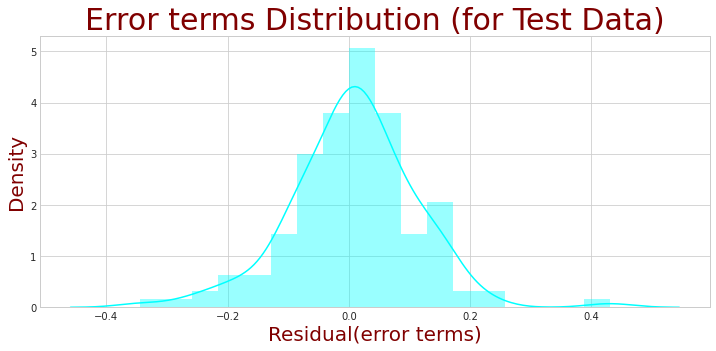

In [375]:
#plotting hist plot to analyse residuals

residual = y_test-y_pred

fig= plt.figure()
plt.figure(figsize = (12,5))
sns.distplot((residual), bins = 18, color='cyan')
plt.title('Error terms Distribution (for Test Data)', fontsize=30,color='maroon')
plt.xlabel('Residual(error terms)', fontsize= 20,color='maroon')
plt.ylabel('Density', fontsize= 20,color='maroon')
plt.show()

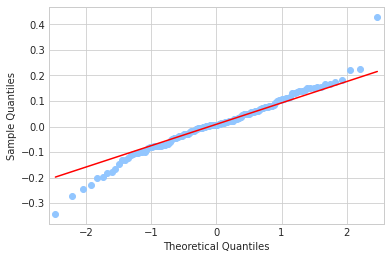

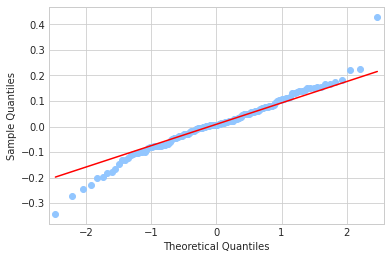

In [376]:
# Q-Q Plot : compare the residuals against normal distribution for Test data
residual = y_test-y_pred
sm.qqplot(residual, line='q')

#### This clearly reflects how our residuals are normally distributed 




#### Linearity check (already covered before using pair plot). No need to plot it again here.

#### Homoscedasticity check

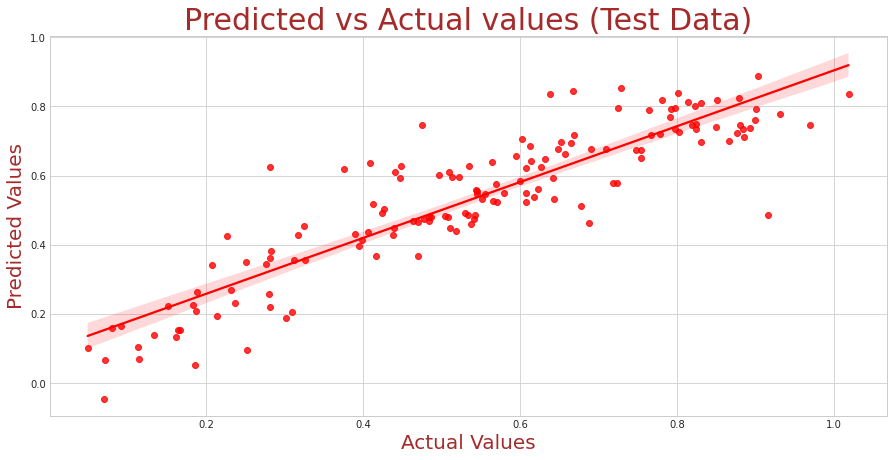

In [377]:
plt.figure(figsize = (15,7))
sns.regplot(x=y_test, y=y_pred, color='red')
plt.title ('Predicted vs Actual values (Test Data)' , fontsize=30, color='brown')
plt.xlabel("Actual Values", fontsize=20, color='brown')
plt.ylabel("Predicted Values", fontsize=20, color='brown')
plt.show()

#### Pattern check (between residuals and predicted values)

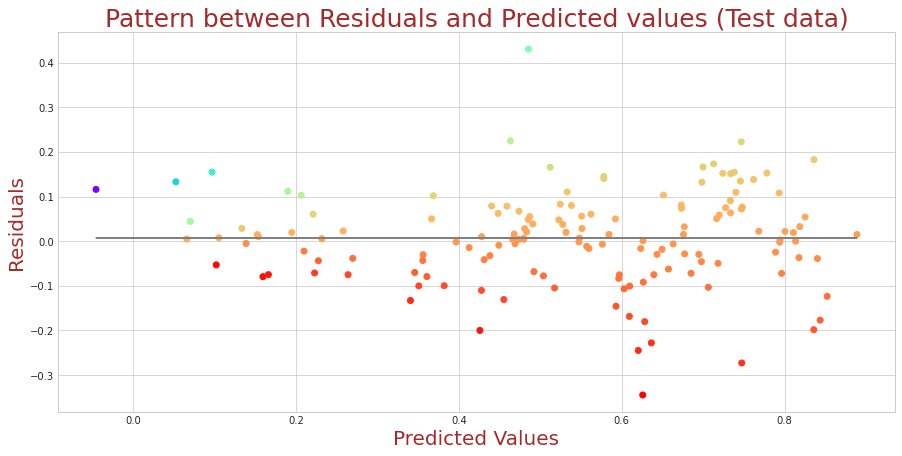

In [378]:
#test data
plt.figure(figsize = (15,7))

cmap=plt.cm.rainbow
#sns.regplot(x=y_pred, y=residual, color='orange')
x=y_pred
y=residual
plt.scatter(x, y, c= np.arctan2(x,y), cmap=cmap ,alpha = 1)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='grey')
plt.title ('Pattern between Residuals and Predicted values (Test data)' , fontsize=25, color= 'brown')
plt.xlabel("Predicted Values", fontsize=20, color= 'brown')
plt.ylabel("Residuals", fontsize=20, color= 'brown')
plt.show()


#### This clearly reflects as we don't see any pattern here as expected from our model. There is no specific relation between the residuals and predicted values



# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 60px;">9. Final Model Evaluation on Test Data</p>

### 9.1 Final model accuracy analysis

<Figure size 432x288 with 0 Axes>

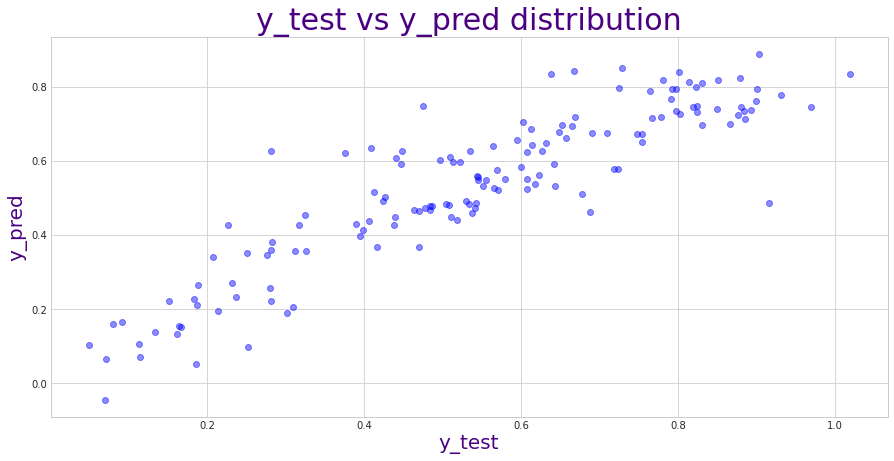

In [379]:
## Plot y_test and y_pred to see the accuracy of our final model
import matplotlib.cm as cm

fig= plt.figure()
c=cm.rainbow
plt.figure(figsize = (15,7))
plt.scatter(y_test, y_pred, alpha= 0.45, color = "blue")
plt.title ('y_test vs y_pred distribution' , fontsize=30, color='indigo')
plt.xlabel("y_test", fontsize=20, color='indigo')
plt.ylabel("y_pred", fontsize=20,  color='indigo')
plt.show()

#### It's clear from the above plot that our model is accurate enough to predict the demand for bikes.

The predicted and actual value points show a significant overlap throughout to indicate the change in demand as well

### 9.2  R-squared comparison for Test and Train 

In [380]:
#calculating R-squared value for test model

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.8068032076231737

#### For train data final model : R-squared = 0.830

### 9.3 Adjusted R-squared comparison

In [381]:
# evaluate the adjusted R squared for test model

r2 = 0.8068032076231737
x_row = x_test.shape[0]

#number of predictors
pred = x_test.shape[1]

#applying adjusted R squared formula
adj_r2 = 1-(1-r2)*(x_row-1)/(x_row-pred-1)
adj_r2

0.758916823187892


# <p style="background-color:white;font-family:newtimeroman;font-size:150%;color:orangered;text-align:left;border-radius:20px 60px;">Insights & Conclusion</p>

#### As per the final model (Model-9), the best fit equation is :
    
    
**cnt** = 0.244843 + (yr x 0.237354) + (atemp x 0.413310) - (season_spring x -0.150225) + (mnth_9 x 0.0914) + (season_winter x 0.046886) - (weathersit_Light-Snow/Rain/Storm x -0.306459) - (weathersit_Mist/Cloudy x -0.077437)


**Top 5 predictors for our target variable are :**
    
    
   - **Feeling Temperature (atemp)**  It has coefficient value 0.4133. Hence, a unit increase in atemp will increase the number of hired bikes by 0.4133 units
    
 
   - **Year (yr)**  :  It has coefficient value 0.237. Hence, a unit increase in yr will increase the number of hired bikes by 0.237 units
   
    
  - **weathersit_Light-Snow/Rain/Storm**  :  It has coefficient value -0.306. Hence, a unit increase in weathersit_Light-Snow/Rain/Storm will decrease the number of hired bikes by -0.306 units  
    
 
 - **season_spring**  :  It has coefficient value -0.150. Hence, a unit increase in season_spring will decrease the number of hired bikes by -0.150 units
    
  
  - **September Month (mnth_9)** It has coefficient value 0.0914. Hence, a unit increase in mnth_9 will increase the number of hired bikes by 0.0914 units
    
    
    It is thus important to keep a check on the above to achieve maximum booking for bikes. 

**BoomBikes** must adopt a business plan with the following pointers in consideration :
    
    1. The rental count is likely to increase with an increase in temperature. So they should start marketing heavily 
    in regions that are higher in termperature and humidity
    
    2. Rental count is likely to decrease in regions with light rain/snow weather patterns. Hence the company should 
    not invest heavily in such regions as it will be an insignificant investment.
    
    3. Fall season encounters a heavy rise in rental count. Hence the company should focus on regions with heavy rainfall
    and specially during months July-October.
    
    4. On the other hand, rental count is likely to decrease during Spring season (Feb-April). So company can offer
    discounts or other offers that may enhance the numbers during Spring.
    
    5. Rental count is likely to high with every passing year. Hence company must plan accordingly in advance on supply of
    bikes per region.


# <p style="background-color:white;font-family:newtimeroman;font-size:110%;color:grey;text-align:left;border-radius:20px 60px;">Happy Biking!!!</p>

![](https://static.wixstatic.com/media/3ac6b0_408aa8e760cd41b1ad5b26762692913b~mv2_d_2600_1882_s_2.jpg/v1/fill/w_600,h_400,al_c,q_80,usm_0.66_1.00_0.01,enc_auto/3ac6b0_408aa8e760cd41b1ad5b26762692913b~mv2_d_2600_1882_s_2.jpg)